In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
test_data = pd.read_csv('dataset_protocols_ABC.csv')
a_data = pd.read_csv('protocol_a.csv')
b_data = pd.read_csv('protocol_b.csv')
c_data = pd.read_csv('protocol_c.csv')

In [5]:
test_data.columns

Index(['Unnamed: 0', 'src_ip', 'sport', 'dst_ip', 'dport', 'proto',
       'payload_bytes_0', 'payload_bytes_1', 'payload_bytes_2',
       'payload_bytes_3', 'payload_bytes_4', 'payload_bytes_5',
       'payload_bytes_6', 'payload_bytes_7', 'payload_bytes_8',
       'payload_bytes_9', 'payload_bytes_10', 'payload_bytes_11',
       'payload_bytes_12', 'direction_0', 'direction_1', 'direction_2',
       'direction_3', 'direction_4', 'direction_5', 'direction_6',
       'direction_7', 'direction_8', 'direction_9', 'direction_10',
       'direction_11', 'direction_12', 'pkt_len_0', 'pkt_len_1', 'pkt_len_2',
       'pkt_len_3', 'pkt_len_4', 'pkt_len_5', 'pkt_len_6', 'pkt_len_7',
       'pkt_len_8', 'pkt_len_9', 'pkt_len_10', 'pkt_len_11', 'pkt_len_12'],
      dtype='object')

In [6]:
def drop_columns(data):
  data.drop(['Unnamed: 0', 'payload_bytes_0','payload_bytes_1',	'payload_bytes_2'], axis = 1, inplace = True)
  return data
test_data = drop_columns(test_data)
b_data = drop_columns(b_data)
c_data = drop_columns(c_data)
a_data = drop_columns(a_data)

In [7]:
def ip_divide(x):
    ret = list()
    for i in range(len(x)):
        temp = list(map(int, x[i].split('.')))
        ret.append(temp)

    return ret


In [8]:
prot_a_srcip = ip_divide(np.array(a_data['src_ip']))
prot_a_dstip = ip_divide(np.array(a_data['dst_ip']))

prot_b_srcip = ip_divide(np.array(b_data['src_ip']))
prot_b_dstip = ip_divide(np.array(b_data['dst_ip']))

prot_c_srcip = ip_divide(np.array(c_data['src_ip']))
prot_c_dstip = ip_divide(np.array(c_data['dst_ip']))

prot_test_srcip = ip_divide(np.array(test_data['src_ip']))
prot_test_dstip = ip_divide(np.array(test_data['dst_ip']))

In [9]:
def insert_newip(data, x, y):
    new_data1 = pd.DataFrame(x, columns = ['0', '1', '2', '3'])
    new_data2 = pd.DataFrame(y, columns = ['4', '5', '6', '7'])

    new_data1 = new_data1.loc[~new_data1.index.duplicated(keep='first')]
    new_data2 = new_data2.loc[~new_data2.index.duplicated(keep='first')]
    data = data.loc[~data.index.duplicated(keep='first')]

    data = pd.concat([data, new_data1, new_data2], axis = 1)

    return data

a_data = insert_newip(a_data, prot_a_srcip, prot_a_dstip)
b_data = insert_newip(b_data, prot_b_srcip, prot_b_dstip)
c_data = insert_newip(c_data, prot_c_srcip, prot_c_dstip)
test_data = insert_newip(test_data, prot_test_srcip, prot_test_dstip)

In [10]:
test_data.drop(['src_ip', 'dst_ip'], axis = 1, inplace = True)
a_data.drop(['src_ip', 'dst_ip'], axis = 1, inplace = True)
b_data.drop(['src_ip', 'dst_ip'], axis = 1, inplace = True)
c_data.drop(['src_ip', 'dst_ip'], axis = 1, inplace = True)


In [11]:
def convert_payload(data):
  data = data.fillna('')
  for i in range(3,13):
    data[f'payload_bytes_{i}'] = data[f'payload_bytes_{i}'].apply(lambda x: len(x))
    data[f'payload_bytes_{i}'] = data[f'payload_bytes_{i}'].replace(0, int(np.mean(data[f'payload_bytes_{i}'])))
  return data

test_data = convert_payload(test_data)
a_data = convert_payload(a_data)
b_data = convert_payload(b_data)
c_data = convert_payload(c_data)

In [12]:
a_data['target'] = 1
b_data['target'] = 2
c_data['target'] = 3

In [13]:
a_data.drop(['dport','proto','direction_0', 'direction_1', 'direction_2', 'direction_3'], axis = 1,inplace = True)
b_data.drop(['dport','proto','direction_0', 'direction_1', 'direction_2', 'direction_3'], axis = 1,inplace = True)
c_data.drop(['dport','proto','direction_0', 'direction_1', 'direction_2', 'direction_3'], axis = 1,inplace = True)
test_data.drop(['dport','proto','direction_0', 'direction_1', 'direction_2', 'direction_3'], axis = 1,inplace = True)

In [14]:
dataset = pd.concat([a_data, b_data, c_data], axis = 0)

In [15]:
dataset = dataset.sample(frac= 1 )
target = dataset['target']

In [ ]:
dataset.head(5)

,sport,payload_bytes_3,payload_bytes_4,payload_bytes_5,payload_bytes_6,payload_bytes_7,payload_bytes_8,payload_bytes_9,payload_bytes_10,payload_bytes_11,...,pkt_len_12,0,1,2,3,4,5,6,7,target
241,33598,146,121,1102,626,2696,2696,2696,1852,641,...,32,172,17,240,131,130,87,143,208,3
1524,53748,1106,267,198,1874,1184,673,2576,2576,2576,...,264,85,47,203,3,33,106,194,198,1
660,40552,1034,267,198,1874,1046,673,2796,2796,2796,...,155,74,130,215,196,128,13,130,113,1
587,33668,146,1344,1385,626,620,1511,196,2264,610,...,32,172,17,240,131,130,87,143,208,3
399,57035,428,2880,2880,1756,1475,673,490,316,102,...,89,240,18,103,211,217,136,99,126,1


In [16]:
dataset.drop('target',axis = 1, inplace = True)

In [17]:
dataset.shape

(3161, 41)

Dataset

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset, target, test_size=0.33, random_state=42, stratify = target)

X_train_xgb = X_train
X_train_xgb['y'] = y_train

In [19]:
a_data.shape

(2000, 42)

In [20]:
a_data_temp = a_data
a_data_target = a_data['target']
a_data_temp.drop('target', axis = 1, inplace = True)
Xa_train, Xa_test, ya_train, ya_test = train_test_split(a_data_temp, a_data_target, test_size=0.8, random_state=42)

In [21]:
print(Xa_train.shape)
print(Xa_test.shape)
print(a_data.shape)

(400, 41)
(1600, 41)
(2000, 41)


In [22]:
b_data_temp = b_data
b_data_target = b_data['target']
b_data_temp.drop('target', axis = 1, inplace = True)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(b_data_temp, b_data_target, test_size=0.2, random_state=42)

In [23]:
print(Xb_train.shape)
print(Xb_test.shape)
print(b_data.shape)

(128, 41)
(33, 41)
(161, 41)


In [24]:
c_data_temp = c_data
c_data_target = c_data['target']
c_data_temp.drop('target', axis = 1, inplace = True)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(c_data_temp, c_data_target, test_size=0.8, random_state=42)

In [25]:
print(Xc_train.shape)
print(Xc_test.shape)
print(c_data.shape)

(200, 41)
(800, 41)
(1000, 41)


In [26]:
X_temp_train = pd.concat([Xc_train,Xb_train,Xa_train], axis = 0)
y_temp_train = pd.concat([yc_train, yb_train, ya_train], axis = 0)
X_temp_train['target'] = y_temp_train
X_temp_train = X_temp_train.sample(frac = 1)
print(X_temp_train.shape)
print(Xc_train.shape[0] + Xb_train.shape[0]+ Xa_train.shape[0])

(728, 42)
728


In [27]:
X_temp_test = pd.concat([Xc_test,Xb_test,Xa_test], axis = 0)
y_temp_test = pd.concat([yc_test, yb_test, ya_test], axis = 0)
X_temp_test['target'] = y_temp_test
X_temp_test = X_temp_test.sample(frac = 1)
print(X_temp_test.shape)
print(Xc_test.shape[0] + Xb_test.shape[0]+ Xa_test.shape[0])

(2433, 42)
2433


In [28]:
print(X_temp_test.shape[0] + X_temp_train.shape[0])
print(dataset.shape)

3161
(3161, 41)


In [29]:
X_train_target = X_temp_train['target']
X_test_target = X_temp_test['target']

In [30]:
X_temp_train.drop('target', axis = 1, inplace = True)
X_temp_test.drop('target', axis = 1, inplace = True)

In [ ]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

ModuleNotFoundError: No module named 'catboost'

In [ ]:
model_params = {'iterations':200, 'learning_rate':0.1, 'depth':6, 'verbose':100}
model = CatBoostClassifier(**model_params)


In [ ]:
model.fit(X_temp_train, X_train_target)

# Предсказания на тестовом наборе
y_pred = model.predict(X_temp_test)

# Оценка точности модели
accuracy = accuracy_score(X_test_target, y_pred)
print(f"Accuracy: {accuracy}")

0:	learn: 0.9475270	total: 12.8ms	remaining: 2.54s
100:	learn: 0.0073361	total: 1.55s	remaining: 1.52s
199:	learn: 0.0026249	total: 2.75s	remaining: 0us
Accuracy: 0.9975339087546239


In [ ]:
test_data

,sport,payload_bytes_3,payload_bytes_4,payload_bytes_5,payload_bytes_6,payload_bytes_7,payload_bytes_8,payload_bytes_9,payload_bytes_10,payload_bytes_11,...,pkt_len_11,pkt_len_12,0,1,2,3,4,5,6,7
0,63868,370,210,1832,754,338,2456,2456,2456,2456,...,1260,1260,55,120,147,65,170,14,68,136
1,57492,1034,2402,1832,1434,128,2800,2800,2050,542,...,291,291,66,116,25,18,218,70,73,126
2,39921,1034,283,2696,2696,2492,762,582,410,160,...,112,335,91,253,185,139,243,67,106,209
3,42404,2456,1112,338,1720,1048,1560,1048,2456,1200,...,632,32,87,188,167,158,27,179,73,232
4,41070,1034,283,312,1434,102,762,2446,410,344,...,204,63,97,46,98,210,215,102,164,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282,40716,1946,283,652,1434,228,1284,582,410,1266,...,665,674,172,17,240,131,130,87,143,208
2283,33524,2456,2456,904,2456,788,762,338,410,2456,...,1260,1260,131,48,141,198,170,14,68,136
2284,55966,2456,1296,178,2456,2456,2456,2456,2456,2456,...,1260,1260,241,200,198,21,170,14,68,136
2285,43136,1648,283,600,1434,196,252,928,410,566,...,32,32,172,17,240,131,130,87,143,208


In [ ]:
y_final_predict = model.predict(test_data)

In [ ]:
submit = pd.DataFrame(y_final_predict, index = test_data.index)

In [ ]:
submit.to_csv('Submission.csv')

In [ ]:
# for_plot_feature = []
# for_plot_importance = []
# # Вывод важности признаков
# feature_importances = model.get_feature_importance()
# for feature_name, importance in zip(X_train.columns, feature_importances):
#     print(f"{feature_name}: {importance}")
#     if importance > 5:
#       for_plot_feature.append(feature_name)
#       for_plot_importance.append(importance)

sport: 0.14455734935565132
payload_bytes_3: 1.1591110357800902
payload_bytes_4: 18.449346619744457
payload_bytes_5: 1.370078048306418
payload_bytes_6: 1.1056586579305472
payload_bytes_7: 0.28716109336542167
payload_bytes_8: 0.5250656173223235
payload_bytes_9: 1.3004857787989867
payload_bytes_10: 1.27122705421375
payload_bytes_11: 0.4512093958615977
payload_bytes_12: 0.7653443245104957
direction_4: 0.18128019159729508
direction_5: 0.078620613816276
direction_6: 0.14565378036710788
direction_7: 0.11452747361523288
direction_8: 0.0
direction_9: 0.022230676750184943
direction_10: 0.0
direction_11: 0.0
direction_12: 0.017003843455726655
pkt_len_0: 0.09553723813066012
pkt_len_1: 0.05473983810310441
pkt_len_2: 0.09756771745970537
pkt_len_3: 0.8805668143079175
pkt_len_4: 1.8999784547233134
pkt_len_5: 0.4314124128728348
pkt_len_6: 0.22248854144243424
pkt_len_7: 0.38504712234078936
pkt_len_8: 0.023911797819670618
pkt_len_9: 0.1583333024267306
pkt_len_10: 0.16146834660301068
pkt_len_11: 0.1448262

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'sport'),
  Text(1, 0, 'payload_bytes_3'),
  Text(2, 0, 'payload_bytes_4'),
  Text(3, 0, 'payload_bytes_5'),
  Text(4, 0, 'payload_bytes_6'),
  Text(5, 0, 'payload_bytes_7'),
  Text(6, 0, 'payload_bytes_8'),
  Text(7, 0, 'payload_bytes_9'),
  Text(8, 0, 'payload_bytes_10'),
  Text(9, 0, 'payload_bytes_11'),
  Text(10, 0, 'payload_bytes_12'),
  Text(11, 0, 'direction_4'),
  Text(12, 0, 'direction_5'),
  Text(13, 0, 'direction_6'),
  Text(14, 0, 'direction_7'),
  Text(15, 0, 'direction_8'),
  Text(16, 0, 'direction_9'),
  Text(17, 0, 'direction_10'),
  Text(18, 0, 'direction_11'),
  Text(19, 0, 'direction_12'),
  Text(20, 0, 'pkt_len_0'),
  Text(21, 0, 'pkt_len_1'),
  Text(22, 0, 'pkt_len_2'),
  Text(23, 0, 'pkt_len_3'),
  Text(24, 0, 'pkt_len_4'),
  Text(25, 0, 'pkt_len_

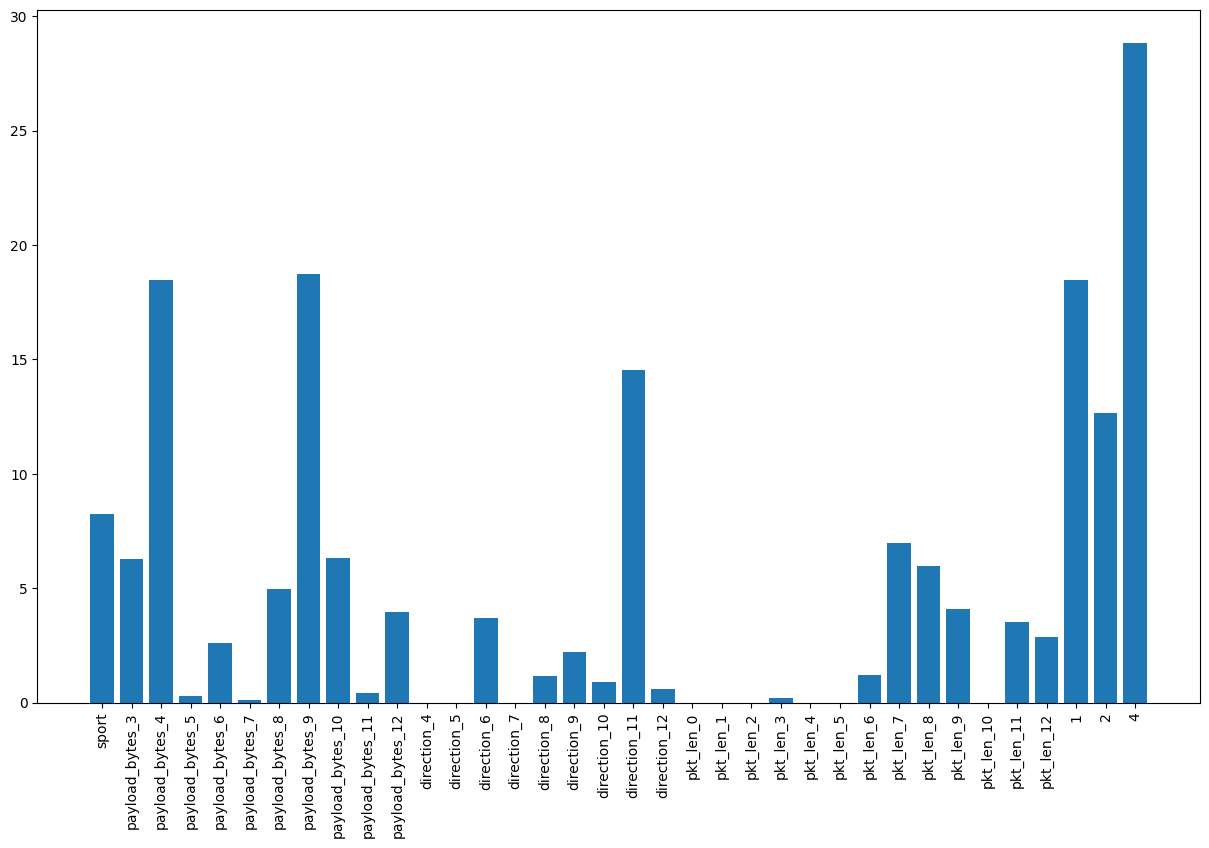

In [ ]:
# plt.subplots(figsize = (15,9))
# plt.bar(for_plot_feature, for_plot_importance)
# plt.xticks(rotation = 90)